# Transforming the 4G Ghent dataset into the format wanted by the simulation (json list)

Dataset available at: https://users.ugent.be/~jvdrhoof/dataset-4g/

In [1]:
import pandas as pd
import os
import json
import matplotlib.pyplot as plt

In [8]:
log_folder = "../new_data/logs_all_4G_Ghent"
save_folder = "../new_data/logs_all_4G_Ghent_json"
log_file = "report_bicycle_0001.log"

In [10]:
for log_file in os.listdir("../new_data/logs_all_4G_Ghent_json"):
    print(log_file)

report_car_0003.json
report_bus_0010.json
report_bus_0003.json
report_car_0002.json
report_foot_0004.json
report_foot_0001.json
report_foot_0008.json
report_car_0008.json
report_bus_0009.json
report_train_0003.json
report_foot_0006.json
report_foot_0007.json
report_bus_0008.json
report_bicycle_0002.json
report_train_0002.json
report_bus_0007.json
report_tram_0003.json
report_car_0007.json
report_bus_0011.json
report_bus_0002.json
report_bus_0005.json
report_train_0001.json
report_bicycle_0001.json
report_foot_0003.json
report_tram_0008.json
report_car_0006.json
report_car_0005.json
report_tram_0005.json
report_car_0001.json
report_tram_0001.json
report_tram_0004.json
report_tram_0007.json
report_bus_0001.json
report_bus_0004.json
report_tram_0002.json
report_foot_0002.json
report_tram_0006.json
report_car_0004.json
report_bus_0006.json
report_foot_0005.json


In [3]:
with open(os.path.join(log_folder,log_file), "r") as log:
    a = log.readlines()

In [4]:
df = pd.read_csv(os.path.join(log_folder,log_file), sep=" ", header=None)
df.columns = ["epoch_ms", "time", "lat", "long", "bytes", "duration"]
df

,epoch_ms,time,lat,long,bytes,duration
0,1452002003586,840,51.036403,3.735912,1766452,840
1,1452002004586,1840,51.036403,3.735912,2810698,1000
2,1452002005586,2840,51.036403,3.735912,3227852,1000
3,1452002006586,3840,51.036403,3.735912,4132442,1000
4,1452002007586,4840,51.036403,3.735912,2942908,1000
...,...,...,...,...,...,...
526,1452002529586,526840,51.052407,3.723440,3303438,1000
527,1452002530586,527840,51.052417,3.723393,1264950,1000
528,1452002531586,528840,51.052426,3.723344,3291346,1000
529,1452002532586,529840,51.052432,3.723284,5032600,1000


In [5]:
#calculate capacity in kbps (bytes / duration in ms)
df["capacity"] = df["bytes"] / df["duration"]
#convert time to seconds
df["time"] = df["time"]/1000

In [6]:
df

,epoch_ms,time,lat,long,bytes,duration,capacity
0,1452002003586,0.840,51.036403,3.735912,1766452,840,2102.919048
1,1452002004586,1.840,51.036403,3.735912,2810698,1000,2810.698000
2,1452002005586,2.840,51.036403,3.735912,3227852,1000,3227.852000
3,1452002006586,3.840,51.036403,3.735912,4132442,1000,4132.442000
4,1452002007586,4.840,51.036403,3.735912,2942908,1000,2942.908000
...,...,...,...,...,...,...,...
526,1452002529586,526.840,51.052407,3.723440,3303438,1000,3303.438000
527,1452002530586,527.840,51.052417,3.723393,1264950,1000,1264.950000
528,1452002531586,528.840,51.052426,3.723344,3291346,1000,3291.346000
529,1452002532586,529.840,51.052432,3.723284,5032600,1000,5032.600000


In [7]:
d_final = {
    "type": "video",
    "downlink": {},
    "uplink": {
        "trace_pattern": df[["time", "duration", "capacity"]].to_dict(orient="records")
    },
}

d_final

{'type': 'video',
 'downlink': {},
 'uplink': {'trace_pattern': [{'time': 0.84,
    'duration': 840,
    'capacity': 2102.9190476190474},
   {'time': 1.84, 'duration': 1000, 'capacity': 2810.698},
   {'time': 2.84, 'duration': 1000, 'capacity': 3227.852},
   {'time': 3.84, 'duration': 1000, 'capacity': 4132.442},
   {'time': 4.84, 'duration': 1000, 'capacity': 2942.908},
   {'time': 5.84, 'duration': 1000, 'capacity': 3723.3},
   {'time': 6.84, 'duration': 1000, 'capacity': 4012.2},
   {'time': 7.84, 'duration': 1000, 'capacity': 3935.6},
   {'time': 8.84, 'duration': 1000, 'capacity': 4163.05},
   {'time': 9.84, 'duration': 1000, 'capacity': 4410.45},
   {'time': 10.84, 'duration': 1000, 'capacity': 3910.95},
   {'time': 11.841, 'duration': 1001, 'capacity': 3398.951048951049},
   {'time': 12.84, 'duration': 999, 'capacity': 3886.136136136136},
   {'time': 13.84, 'duration': 1000, 'capacity': 4118.85},
   {'time': 14.841, 'duration': 1001, 'capacity': 4619.1308691308695},
   {'time': 

# Main code

In [2]:
import pandas as pd
import os
import json

In [5]:
log_folder = "../new_data/logs_all_4G_Ghent"
save_folder = "../new_data/logs_all_4G_Ghent_json"

In [6]:
for log_file in os.listdir(log_folder):
    
    print("Reading from: ", os.path.join(log_folder,log_file))
    
    with open(os.path.join(log_folder,log_file), "r") as log:
        a = log.readlines()

    df = pd.read_csv(os.path.join(log_folder,log_file), sep=" ", header=None)
    df.columns = ["epoch_ms", "time", "lat", "long", "bytes", "duration"]
    #calculate capacity in kbps (bytes / duration in ms)
    df["capacity"] = df["bytes"] / df["duration"]
    #convert time to seconds
    df["time"] = df["time"]/1000

    d_final = {
        "type": "video",
        "downlink": {},
        "uplink": {
            "trace_pattern": df[["time", "duration", "capacity"]].to_dict(orient="records")
        },
    }

    save_file = log_file.split(".")[0] + ".json"
    print("Saving to: ", os.path.join(save_folder,save_file))
    with open(os.path.join(save_folder,save_file), "w") as log_save:
        json.dump(d_final, log_save)

Reading from:  ../new_data/logs_all_4G_Ghent/report_tram_0004.log
Saving to:  report_tram_0004.json
Reading from:  ../new_data/logs_all_4G_Ghent/report_bus_0011.log
Saving to:  report_bus_0011.json
Reading from:  ../new_data/logs_all_4G_Ghent/report_foot_0002.log
Saving to:  report_foot_0002.json
Reading from:  ../new_data/logs_all_4G_Ghent/report_bicycle_0001.log
Saving to:  report_bicycle_0001.json
Reading from:  ../new_data/logs_all_4G_Ghent/report_tram_0008.log
Saving to:  report_tram_0008.json
Reading from:  ../new_data/logs_all_4G_Ghent/report_foot_0001.log
Saving to:  report_foot_0001.json
Reading from:  ../new_data/logs_all_4G_Ghent/report_train_0001.log
Saving to:  report_train_0001.json
Reading from:  ../new_data/logs_all_4G_Ghent/report_tram_0006.log
Saving to:  report_tram_0006.json
Reading from:  ../new_data/logs_all_4G_Ghent/report_tram_0002.log
Saving to:  report_tram_0002.json
Reading from:  ../new_data/logs_all_4G_Ghent/report_bus_0001.log
Saving to:  report_bus_0001.j

### Check output after running test

In [2]:
parent_dir = "../output/"
for pickle_file in os.listdir(parent_dir):
    print(pickle_file)

    d = pd.read_pickle(os.path.join(parent_dir, pickle_file))
    print(d.keys())

rates_delay_loss_test_bla.pickle
dict_keys(['./new_data/Norway_3G_data_json/bus_2010-09-28_1407CEST.json'])


In [19]:
d.keys()

dict_keys(['./new_data/logs_all_4G_Ghent_json/report_bus_0003.json', './new_data/logs_all_4G_Ghent_json/report_car_0002.json', './new_data/logs_all_4G_Ghent_json/report_foot_0004.json'])

In [3]:
d['./new_data/Norway_3G_data_json/bus_2010-09-28_1407CEST.json'].keys()

dict_keys(['bandwidth_prediction', 'sending_rate', 'receiving_rate', 'delay', 'loss_ratio', 'log_prediction', 'reward'])

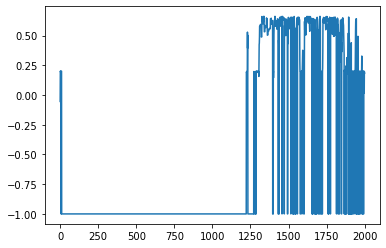

In [5]:
plt.plot(d['./new_data/Norway_3G_data_json/bus_2010-09-28_1407CEST.json']['reward'])